In [31]:
import numpy as np
import pandas as pd

# for box cox transformation
from scipy import stats

# for min max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import charset_normalizer

np.random.seed(0)

## Handling Missing values

In [3]:
df = pd.read_csv("Building_Permits.csv")

/tmp/ipykernel_9853/1014540178.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Building_Permits.csv")


In [4]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [5]:
missing_values_count = df.isnull().sum()
missing_values_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [6]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

26.26002315058403


### Figure out why the data is missing

- Is the data missing because it wasn't recorded or because it doesn't exists?

In [7]:
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


- This shows that all the rows in our dataset has atleast 1 missing value

In [8]:
# fill the null values with 0
df.fillna(0).head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,Geary,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0,Market,St,...,3.0,constr type 3,0.0,0,0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [9]:
bfill_df = df.fillna(method='bfill', axis=0)

/tmp/ipykernel_9853/1852004322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill_df = df.fillna(method='bfill', axis=0)


## Scaling and Normalization

- Scaling change the range of your data
- Normalizatio change the shape of the distribution of your data

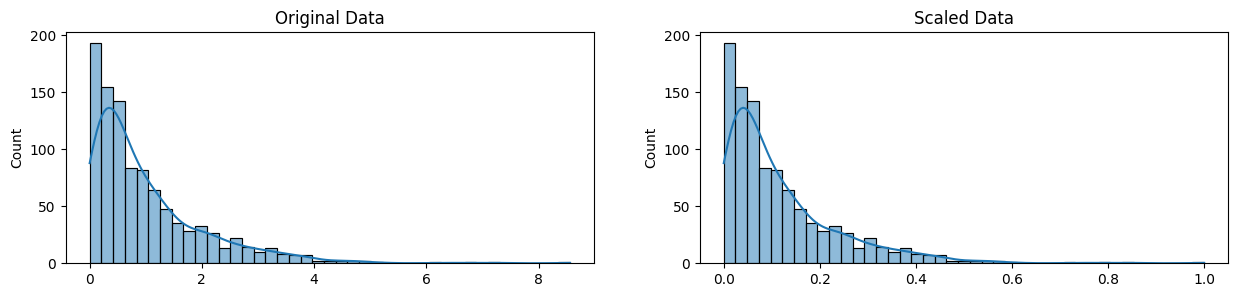

In [10]:
original_data = np.random.exponential(size = 1000)

scaled_data = minmax_scaling(original_data, columns=[0])

fix, ax = plt.subplots(1, 2, figsize = (15, 3))

sns.histplot(original_data, ax = ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
plt.show()

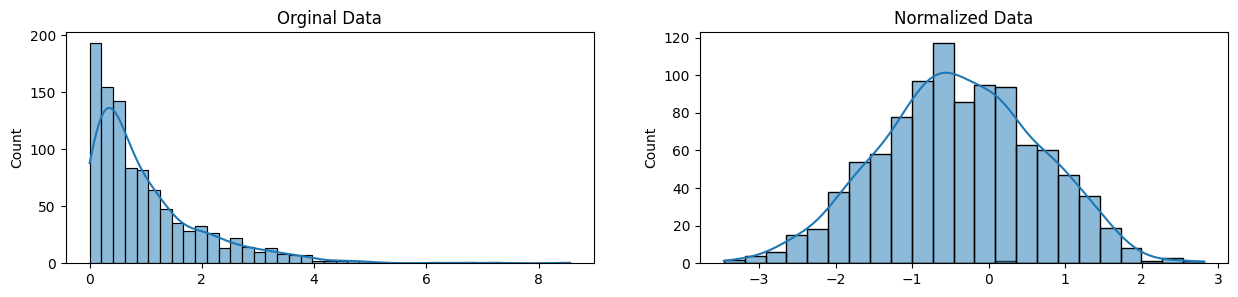

In [12]:
normalized_data = stats.boxcox(original_data)

fix, ax = plt.subplots(1, 2, figsize = (15, 3))

sns.histplot(original_data, ax = ax[0], kde=True, legend=False)
ax[0].set_title("Orginal Data")

sns.histplot(normalized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")
plt.show()

## Parsing Dates

In [24]:
df["Permit Creation Date"][:5]

0    05/06/2015
1    04/19/2016
2    05/27/2016
3    11/07/2016
4    11/28/2016
Name: Permit Creation Date, dtype: object

In [23]:
date_lengths = df["Permit Creation Date"].str.len()
date_lengths.value_counts()

Permit Creation Date
10    198900
Name: count, dtype: int64

In [21]:
df['date_parsed'] = pd.to_datetime(df['Permit Creation Date'])

In [25]:
df["date_parsed"]

0        2015-05-06
1        2016-04-19
2        2016-05-27
3        2016-11-07
4        2016-11-28
            ...    
198895   2017-12-05
198896   2017-12-05
198897   2017-12-06
198898   2017-12-06
198899   2017-12-07
Name: date_parsed, Length: 198900, dtype: datetime64[ns]

In [26]:
day_of_permit = df["date_parsed"].dt.day
day_of_permit.head()

0     6
1    19
2    27
3     7
4    28
Name: date_parsed, dtype: int32

/tmp/ipykernel_9853/1303767004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_permit, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

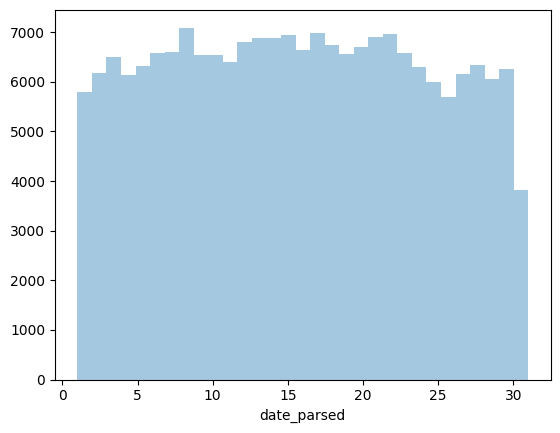

In [30]:
sns.distplot(day_of_permit, kde=False, bins=31)

## Character Encoding

In [32]:
text = "This is the euro symbol: €"
type(text)

str

In [33]:
text_utf_encode = text.encode("utf-8", errors="replace")
type(text_utf_encode)

bytes

In [34]:
text_utf_encode

b'This is the euro symbol: \xe2\x82\xac'

In [35]:
print(text_utf_encode.decode("utf-8"))

This is the euro symbol: €


In [36]:
print(text_utf_encode.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [38]:
before = "This is the euro symbol: €"
print(before)
after = before.encode("ascii", errors = "replace")
print(after.decode("ascii"))

This is the euro symbol: €
This is the euro symbol: ?
